### Load everything

In [28]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageChops
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, recall_score, precision_score, classification_report

In [98]:
# Read the data files
train_data = pd.read_csv("data/train.csv")
test_data = pd.read_csv("data/test.csv")

print(train_data.head())

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         

In [99]:
# Slice the data and create X, y and test_data
X = train_data.ix[:, 1:].values
y = train_data.ix[:, 0].values
test_data = test_data.values

print(X.shape)
print(y.shape)

(42000, 784)
(42000,)


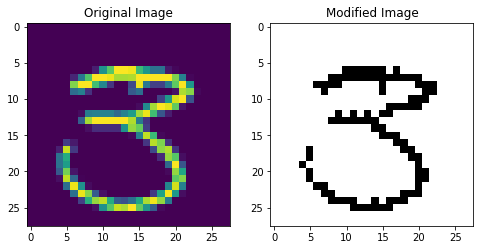

In [103]:
# Visualize a digit
%matplotlib inline

fig, ax = plt.subplots(ncols=2, figsize=(8,8))
ax1, ax2 = ax

original_im = X[7].reshape((int(np.sqrt(X[7].shape[0])), int(np.sqrt(X[7].shape[0]))))
new_im = Image.fromarray(original_im.astype('uint8')).convert("1") # Convert the values to 8-bit and convert the image to 1-bit black and white
new_im = ImageChops.invert(new_im)

ax1.imshow(original_im)
ax2.imshow(new_im)
ax1.set_title("Original Image")
ax2.set_title("Modified Image")
plt.show()

In [104]:
# Preprocess the images
def image_preprocessing(arr):
    arr = arr.reshape((int(np.sqrt(arr.shape[0])), int(np.sqrt(arr.shape[0])))).astype('uint8')
    im = Image.fromarray(arr).convert("1") # Convert the values to 8-bit and convert the image to 1-bit black and white
    im = ImageChops.invert(im)
    new_arr = np.array(im.getdata())
    return new_arr
    
X = np.apply_along_axis(image_preprocessing, 1, X)
test_data = np.apply_along_axis(image_preprocessing, 1, test_data)

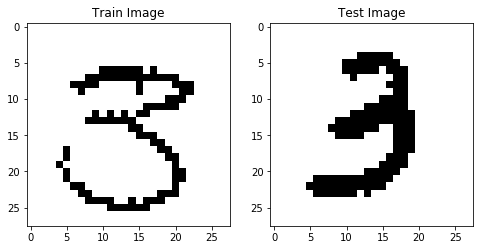

In [105]:
# Verify the images
fig, ax = plt.subplots(ncols=2, figsize=(8,8))
ax1, ax2 = ax

ax1.imshow(Image.fromarray(X[7].reshape((int(np.sqrt(X[7].shape[0])), int(np.sqrt(X[7].shape[0]))))))
ax2.imshow(Image.fromarray(test_data[7].reshape((int(np.sqrt(test_data[7].shape[0])), int(np.sqrt(test_data[7].shape[0]))))))
ax1.set_title("Train Image")
ax2.set_title("Test Image")
plt.show()

### Preprocessing

In [106]:
# Scale the data
X_scale = StandardScaler()

X = X_scale.fit_transform(X)
test_data = X_scale.transform(test_data)

c:\program files\python35\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


### Model Selection

In [107]:
# Split partial data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(33600, 784) (8400, 784)
(33600,) (8400,)


In [ ]:
# Select model/classifier
names = [
    "Logistic Regression",
    "Nearest Neighbors",
    "Linear SVM",
    "RBF SVM",
    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Neural Net",
    "AdaBoost",
    "Naive Bayes",
    "LDA",
    "QDA",
    "GBC"
]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025, random_state=3),
    SVC(gamma=2, C=1, random_state=3),
    GaussianProcessClassifier(warm_start=True, random_state=3),
    DecisionTreeClassifier(max_depth=5, random_state=3),
    RandomForestClassifier(max_depth=5, n_estimators=100, random_state=3),
    MLPClassifier(alpha=1, max_iter=5000, random_state=3),
    AdaBoostClassifier(random_state=3),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    GradientBoostingClassifier(random_state=3)
]

for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    score = recall_score(y_pred, y_test, average="micro")
    print("{}: {}".format(name, score))

### Model Creation

In [119]:
# Create the final model/classifier for test
clf = RandomForestClassifier(500, random_state=3)
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [120]:
# Compute accuracy and create confusion matrix
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

print("Accuracy: {}%".format(round(accuracy*100), 1))
print("Confusion Matrix: ")
print(cm)
print("Classification Report: ")
print(cr)

Accuracy: 91.0%
Confusion Matrix: 
[[786   0   1   0   1   5   6   0   6   1]
 [  0 866   5   1   0   1   3   4   5   1]
 [  6   8 731  14   8   2   9  17  14   1]
 [  6   5  28 765   1  34   0   7  10   4]
 [  0   3  17   3 768   0   5   3   0  33]
 [ 12   8   5  57   4 670  15   0  17   2]
 [ 11   2   7   2   7  10 785   0   2   0]
 [  0   5   7   9   7   0   1 854   2  24]
 [ 15  26  15  26   6  23   5   1 688  10]
 [  4   2   1   9  39   6   0  30   4 771]]
Classification Report: 
             precision    recall  f1-score   support

          0       0.94      0.98      0.96       806
          1       0.94      0.98      0.96       886
          2       0.89      0.90      0.90       810
          3       0.86      0.89      0.88       860
          4       0.91      0.92      0.92       832
          5       0.89      0.85      0.87       790
          6       0.95      0.95      0.95       826
          7       0.93      0.94      0.94       909
          8       0.92      0.84

### Prediction

In [123]:
# Create the final model/classifier for prediction
clf = RandomForestClassifier(500, random_state=3)
clf.fit(X, y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=3,
            verbose=0, warm_start=False)

In [124]:
# Predict and save the predicted data to csv
prediction = clf.predict(test_data)
prediction = pd.DataFrame({"ImageId": range(1, len(prediction)+1), "Label": prediction})
prediction.to_csv("data/prediction.csv", index=None)

### Kaggle Accuracy Result: 96.7% (0.96714)